# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
#!pip install spacy --upgrade
!pip install spacy==2.2.3

In [2]:
import spacy
spacy.__version__

'2.2.3'

In [3]:
!python3 -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [4]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# Etapa 2: Carregamento da base de dados

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
base_dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_and_DS/notebooks_JGranatyr/data/base_treinamento.txt', encoding = 'utf-8')

In [7]:
base_dados.shape

(196, 2)

In [8]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [9]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


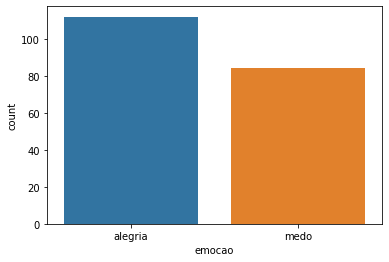

In [10]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [11]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [13]:
print(stop_words)

{'tentar', 'menor', 'grande', 'todas', 'tive', 'pontos', 'oitava', 'toda', 'tivemos', 'mal', 'estas', 'relação', 'seus', 'porquanto', 'posição', 'estou', 'dá', 'portanto', 'vossa', 'nesse', 'essas', 'são', 'através', 'disso', 'nos', 'debaixo', 'sempre', 'tentaram', 'ele', 'usar', 'está', 'local', 'nove', 'do', 'foram', 'vezes', 'sexta', 'és', 'isto', 'cima', 'é', 'ponto', 'pois', 'cá', 'primeiro', 'quê', 'pôde', 'dezoito', 'como', 'ver', 'somente', 'assim', 'deve', 'tenho', 'grandes', 'vosso', 'baixo', 'esta', 'dessa', 'daquela', 'breve', 'conhecida', 'nossos', 'estar', 'inicio', 'os', 'ademais', 'não', 'estado', 'tarde', 'meio', 'desta', 'bastante', 'geral', 'isso', 'te', 'último', 'pelo', 'vem', 'doze', 'por', 'deverá', 'que', 'em', 'cedo', 'estivemos', 'obrigado', 'uma', 'dezasseis', 'porque', 'após', 'pode', 'à', 'ter', 'onde', 'novas', 'oito', 'foi', 'pouco', 'somos', 'você', 'ainda', 'podem', 'sistema', 'foste', 'mil', 'estava', 'poder', 'tendes', 'teus', 'estão', 'tivestes', 'ta

In [14]:
len(stop_words)

413

In [15]:
#pln = spacy.load('pt_core_news_sm')
pln = spacy.load('pt')

In [16]:
pln

In [17]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [18]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [19]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [20]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [21]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [22]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [23]:
type(exemplo_base_dados)

list

In [24]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [25]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [26]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [27]:
type(exemplo_base_dados[0][1])

dict

In [28]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [29]:
len(base_dados_final)

196

In [30]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [31]:
base_dados_final[0][0]

'trabalhar agradável'

In [32]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [33]:
type(base_dados_final[0][1])

dict

In [34]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

# Etapa 5: Criação do classificador

In [45]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [46]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.006828416662756354}
{'textcat': 4.846938317371041e-08}
{'textcat': 1.627505730183998e-08}
{'textcat': 8.569044807060777e-09}
{'textcat': 5.3577453862363456e-09}
{'textcat': 3.5807403708787433e-09}
{'textcat': 3.0093193076341507e-09}
{'textcat': 2.6506254829916642e-09}
{'textcat': 2.1517854997821217e-09}
{'textcat': 1.681823041943531e-09}


In [47]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [48]:
historico_loss = np.array(historico_loss)
historico_loss

array([6.82841666e-03, 4.84693832e-08, 1.62750573e-08, 8.56904481e-09,
       5.35774539e-09, 3.58074037e-09, 3.00931931e-09, 2.65062548e-09,
       2.15178550e-09, 1.68182304e-09])

Text(0, 0.5, 'Erro')

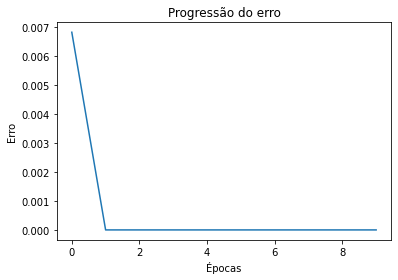

In [49]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [50]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [51]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [52]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [53]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [54]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [55]:
previsao.cats

{'ALEGRIA': 0.8908241987228394, 'MEDO': 0.3369705379009247}

In [56]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.00020507843873929232, 'MEDO': 0.9997426867485046}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [57]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [58]:
previsoes

[{'ALEGRIA': 0.9997568726539612, 'MEDO': 0.00020584286539815366},
 {'ALEGRIA': 0.9991620779037476, 'MEDO': 0.0009976793080568314},
 {'ALEGRIA': 0.9999305009841919, 'MEDO': 0.00033352035097777843},
 {'ALEGRIA': 0.9999103546142578, 'MEDO': 0.0005065642180852592},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.0004274618695490062},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996442794799805, 'MEDO': 0.0004088230198249221},
 {'ALEGRIA': 0.9998799562454224, 'MEDO': 0.0003307582519482821},
 {'ALEGRIA': 0.9997640252113342, 'MEDO': 0.0006144681246951222},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999375343322754, 'MEDO': 0.00011354793241480365},
 {'ALEGRIA': 0.9999407529830933, 'MEDO': 0.0001529556466266513},
 {'ALEGRIA': 0.9996381998062134, 'MEDO': 0.000291681062662974},
 {'ALEGRIA': 0.9996336698532104, 'MEDO': 0.0003980806504841894},
 {'ALEGRIA': 0.99995458

In [59]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [60]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [61]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [63]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [64]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

FileNotFoundError: ignored

In [ ]:
base_dados_teste.head()

In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [ ]:
base_dados_teste.head()

In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm